In [1]:
import dask.dataframe as dd
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt

df_review = dd.read_csv(
    r'C:\Users\thais\Google Drive\Ciencia de dados e Big data\13.TCC\archive\20191226-reviews.csv')
df_item = dd.read_csv(
    r'C:\Users\thais\Google Drive\Ciencia de dados e Big data\13.TCC\archive\20191226-items.csv')

In [2]:
df=df_review.merge(df_item[['asin', 'brand']])
df=df.drop(['name','date','verified','title','helpfulVotes'], axis=1)
df

,asin,rating,body,brand
npartitions=1,,,,
,object,int64,object,object
,...,...,...,...


In [3]:
missing_value=df[['rating', 'body', 'brand']].isnull().sum().compute()
print(missing_value)

rating      0
body       21
brand     200
dtype: int64


In [4]:
df=df.dropna(subset=['rating', 'body', 'brand'])

In [5]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [6]:
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [7]:
import re
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words("english")
nlp = spacy.load("en_core_web_sm")

def lemmatize(text, nlp=nlp):  
    doc = nlp(" ".join(text))
    lemmatized = [token.lemma_ for token in doc]
    
    return lemmatized

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return list(
        filter(lambda word: word.isalnum(), tokens)
    )
def remove_stopwords(words):
    filtered = filter(lambda word: word not in stop_words, words)
    return list(filtered)

def remove_newlinechars(text):
    return re.sub(r'\s+', ' ', text)

def remove_numbers(text):
    return re.sub(r'\d+', '', text) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    df['cleaned_text']=df['body'].map(
        lambda text:str(text).lower()).map(
        remove_numbers).map(
        remove_newlinechars).map(
        tokenize).map(
        remove_stopwords).map(
        lemmatize).map(
        ' '.join)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
X = vectorizer.fit_transform(df['cleaned_text'].compute())
features_tfidf=vectorizer.get_feature_names()
vocabulary=vectorizer.vocabulary_
print(vocabulary)

{'buy': 659, 'service': 4395, 'nearly': 3220, 'year': 5626, 'start': 4708, 'time': 5042, 'last': 2717, 'motorola': 3153, 'upgrade': 5309, 'one': 3378, 'good': 2118, 'phone': 3613, 'ever': 1669, 'well': 5504, 'problem': 3800, 'make': 2923, 'call': 682, 'consider': 973, 'give': 2085, 'shot': 4458, 'opinion': 3401, 'cell': 745, 'company': 895, 'got': 2129, 'say': 4300, 'easy': 1501, 'use': 5334, 'hear': 2253, 'person': 3594, 'talk': 4907, 'fine': 1854, 'deal': 1177, 'star': 4706, 'lock': 2845, 'pay': 3543, 'additional': 70, 'fee': 1818, 'unlock': 5265, 'product': 3812, 'used': 5337, 'project': 3824, 'work': 5573, 'wonder': 5565, 'definitely': 1222, 'recommend': 4005, 'anyone': 216, 'interested': 2560, 'buying': 661, 'stop': 4740, 'cancel': 696, 'get': 2069, 'go': 2107, 'new': 3249, 'day': 1165, 'contract': 1003, 'expire': 1738, 'course': 1056, 'want': 5457, 'keep': 2652, 'number': 3326, 'highly': 2291, 'old': 3373, 'switch': 4881, 'today': 5063, 'mail': 2914, 'statement': 4715, 'month': 3

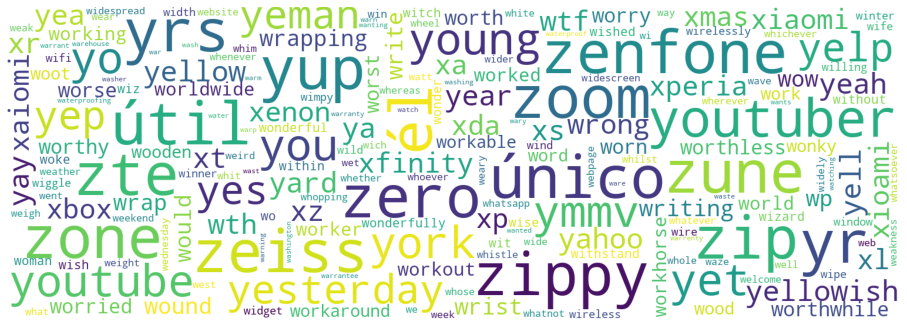

In [16]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud (
    max_font_size=100, width=1520, height=535, colormap='viridis',
    background_color='white').generate_from_frequencies(
    vocabulary)
plt.figure(figsize=(16,9))
plt.axis("off")
plt=plt.imshow(wordcloud)